In [1]:
from psisim import universe
import matplotlib.pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload 2

In [2]:
known_planets = universe.ExoArchive_Universe("Exoplane_Table")

In [3]:
known_planets.Load_ExoArchive_Universe()

Exoplane_Table already exists:
    we'll attempt to read this file as an astropy QTable


In [4]:
known_planets.planets

PlanetName,StarName,SMA,Ecc,Inc,PlanetMass,PlanetRadius,PlanetTeq,RA,Dec,Distance,StarSpT,StarMass,StarTeff,StarRad,StarLogg,StarLum,StarAge,StarVsini,StarRadialVelocity,StarZ,StarParallax,StarBMag,StarVmag,StarRmag,StarImag,StarJmag,StarHmag,StarKmag,DiscoveryMethod,Flux Ratio,ProjAU,Phase,AngSep,PlanetLogg
,,AU,,deg,,,,,,,,,,,,solLum,Gyr,km / s,km / s,dex,mas,,,,,,,,,,AU,,mas,
object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,float64,float64,float64,float64
HD 20794 c,HD 20794,0.2036,0.0,90.0,2.4,1.35,508.0,49.9997666,-43.0666533,6.00278,G8 V,0.7,5401.0,0.92,4.22,0.6870684400142322,5.76,3.0,87.95,-0.4,166.561,4.966,4.26,nan,3.465,3.032,2.709,2.636,Radial Velocity,nan,nan,nan,33.91761817024779,3.110698786682366
HD 20794 d,HD 20794,0.3499,0.0,90.0,4.8,2.04,388.0,49.9997666,-43.0666533,6.00278,G8 V,0.7,5401.0,0.92,4.22,0.6870684400142322,5.76,3.0,87.95,-0.4,166.561,4.966,4.26,nan,3.465,3.032,2.709,2.636,Radial Velocity,nan,nan,nan,58.289659124605606,3.053135984484562
HD 208487 b,HD 208487,0.524,0.24,nan,165.265,14.2,nan,329.3332489,-37.7641354,45.147,G2 V,1.13,6067.0,1.2,4.33,1.7538805018417611,8.15,4.61,5.49,0.022,22.1214,8.023,7.47,nan,nan,6.477,6.213,6.159,Radial Velocity,nan,nan,nan,11.60652978049483,2.9047592811501257
HD 20868 b,HD 20868,0.95,0.75,nan,397.2875,13.7,nan,50.1794053,-33.72969,47.7223,K3/4 IV,0.39,4802.0,0.76,4.26,0.29580124665515456,4.5,1.1,46.12,0.05,20.9257,10.935,9.92,nan,nan,8.138,7.641,7.543,Radial Velocity,nan,nan,nan,19.906836007484973,3.3168188485542527
HD 209458 b,HD 209458,0.04707,0.0,86.71,232.0159,15.581,1459.0,330.7950219,18.8842419,48.3016,G0 V,1.23,6091.0,1.19,4.45,1.7021585083949506,3.1,4.4,-14.74,0.01,20.6745,8.168,7.65,nan,7.037,6.591,6.366,6.308,Radial Velocity,nan,nan,nan,0.9745018798549115,2.971482174841042
HD 210277 b,HD 210277,1.13,0.48,nan,410.0007,13.6,nan,332.3748117,-7.5505962,21.2985,G0 V,1.01,5538.0,1.07,4.38,0.9289663867799364,12.0,1.8,-21.1,0.22,46.9229,7.296,6.54348,nan,5.765,5.275,4.957,4.799,Radial Velocity,nan,nan,nan,53.05537948681832,3.3368618634178238
HD 210702 b,HD 210702,1.148,0.028,nan,574.63664,13.4,nan,332.9638643,16.0404806,54.1963,K1 III,1.61,4951.0,4.92,3.28,14.092887984218748,2.1,1.99,16.39,0.04,18.4231,6.895,5.93022,nan,nan,4.508,3.995,3.984,Radial Velocity,nan,nan,nan,21.182257829409018,3.496338799268739
HD 212301 b,HD 212301,0.03,0.0,nan,162.0933,14.2,nan,336.8803957,-77.7183219,54.2304,F8 V,1.55,6239.0,1.16,4.5,1.7498466886246569,1.0,7.0,4.87,0.18,18.4109,8.314,7.76,nan,nan,6.765,6.522,6.466,Radial Velocity,nan,nan,nan,0.5531952557974862,2.896343457190833


# What is accessible from Keck? 

In [5]:
#Let's say 1 micron
wv = 1e-6
D = 10
iwa = wv/D*206265*1000 #One lambda/D in mas. 
good_sep = (known_planets.planets['AngSep'].value > 0.5*iwa) & (known_planets.planets['AngSep'].value < 200)

# We'll semi-randomly pick geometric albedo = 0.15

In [6]:
geometric_albedo = 0.15
contrast = geometric_albedo * (known_planets.planets['PlanetRadius']*6.378e3/(known_planets.planets['SMA']*1.496e9))[good_sep]**2

angsep = known_planets.planets['AngSep'][good_sep]

(1e-10, 1e-06)

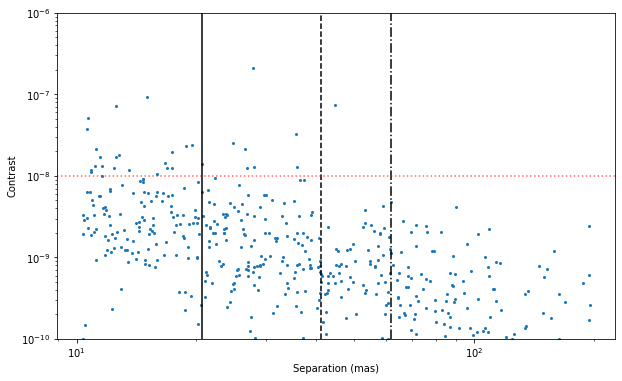

In [7]:
fig,axis = plt.subplots(1,1,figsize=(10,6))
plt.loglog(angsep,contrast,'o',markersize=2)
plt.xlabel("Separation (mas)")
plt.ylabel("Contrast")
axis.axvline(iwa,color='k')
axis.axvline(2*iwa,color='k',linestyle='--')
axis.axvline(3*iwa,color='k',linestyle='-.')
axis.axhline(1e-8,color='r',linestyle=':',alpha=0.6)
plt.ylim(1e-10,1e-6)

In [8]:
#Some Cleaning
non_nans = np.isfinite(contrast)
contrast_clean = contrast[non_nans]

In [9]:
bestest = np.argsort(contrast_clean)[::-1]

In [10]:
known_planets.planets['StarName','PlanetName'][good_sep][non_nans][bestest]

StarName,PlanetName
object,object
GJ 876,GJ 876 c
GJ 1148,GJ 1148 b
GJ 876,GJ 876 b
rho CrB,rho CrB b
HIP 12961,HIP 12961 b
HIP 48714,HIP 48714 b
GJ 3512,GJ 3512 b
HIP 79431,HIP 79431 b
GJ 414 A,GJ 414 A c


# Now with a PSI IWA Cutoff

In [11]:
#Let's say 1 micron
wv = 1e-6
D = 30
iwa = wv/D*206265*1000 #One lambda/D in mas. 
good_sep = (known_planets.planets['AngSep'].value > 0.5*iwa) & (known_planets.planets['AngSep'].value < 200)

In [12]:
geometric_albedo = 0.15
contrast = geometric_albedo * (known_planets.planets['PlanetRadius']*6.378e3/(known_planets.planets['SMA']*1.496e9))[good_sep]**2

angsep = known_planets.planets['AngSep'][good_sep]

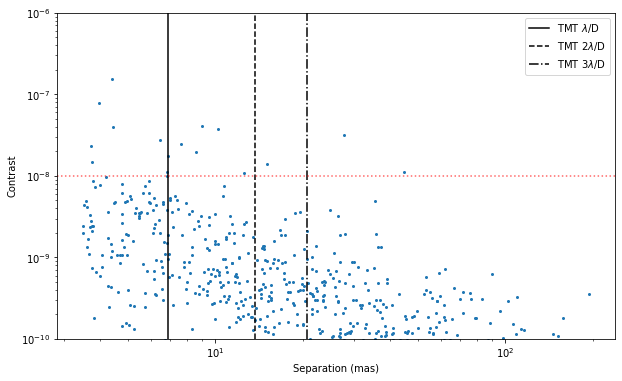

In [13]:
fig,axis = plt.subplots(1,1,figsize=(10,6))
plt.loglog(angsep,contrast,'o',markersize=2)
plt.xlabel("Separation (mas)")
plt.ylabel("Contrast")
axis.axvline(iwa,color='k',label=r"TMT $\lambda$/D")
axis.axvline(2*iwa,color='k',linestyle='--',label=r"TMT $2\lambda$/D")
axis.axvline(3*iwa,color='k',linestyle='-.',label=r"TMT $3\lambda$/D")
axis.axhline(1e-8,color='r',linestyle=':',alpha=0.6)
plt.ylim(1e-10,1e-6)
plt.legend()